In [27]:
import numpy as np
from pydrake.all import (
    AddMultibodyPlantSceneGraph,
    DiagramBuilder,
    MultilayerPerceptron,
    Parser,
    PerceptronActivationType,
    Simulator,
    PlanarSceneGraphVisualizer,
    ZeroOrderHold,
    FittedValueIteration,
    DynamicProgrammingOptions,
    SceneGraph,
    PeriodicBoundaryCondition,
    LogVectorOutput,
    WrapToSystem,
    LinearQuadraticRegulator,
    PiecewisePolynomial,
    TrajectorySource,
)
from IPython.display import HTML, display
from IPython.display import display, clear_output, SVG, display
import pydot
import pandas as pd
import altair as alt


In [23]:
trajectory_inputs = np.array(
    [
        -1.72919110e01,
        -1.81525089e01,
        -1.90208653e01,
        -1.99435311e01,
        -2.07281895e01,
        -2.10988257e01,
        -2.12355170e01,
        -2.09822998e01,
        -2.04264606e01,
        -1.95679994e01,
        -1.84126498e01,
        -1.70791671e01,
        -1.55471821e01,
        -1.39490295e01,
        -1.22904856e01,
        -1.06233143e01,
        -9.01155788e00,
        -7.41306616e00,
        -5.90742762e00,
        -4.42832444e00,
        -3.02882730e00,
        -1.65894613e00,
        -3.38424939e-01,
        9.64031853e-01,
        2.24842424e00,
        3.54155995e00,
        4.83994164e00,
        6.19136002e00,
        7.56045729e00,
        9.04369795e00,
        1.05432448e01,
        1.22344216e01,
        1.39536391e01,
        1.58691413e01,
        1.78315342e01,
        1.99345989e01,
        2.20351044e01,
        2.41313444e01,
        2.60307076e01,
        2.77331939e01,
        2.89250164e01,
        2.98104405e01,
        2.99361754e01,
        2.98086806e01,
        2.89080295e01,
        2.78969275e01,
        2.63092112e01,
        2.46875694e01,
        2.28284491e01,
        2.09572567e01,
        1.90498479e01,
        1.71767267e01,
        1.53607514e01,
        1.36304341e01,
        1.19857749e01,
        1.04773550e01,
        9.05067859e00,
        7.81734062e00,
        6.64844881e00,
        5.75293884e00,
        4.89648341e00,
        4.42239148e00,
        4.00219444e00,
        3.95926166e00,
        4.01987019e00,
        4.39110262e00,
        4.88343842e00,
        5.57761318e00,
        6.36984605e00,
        7.26013705e00,
        8.20109428e00,
        9.17245125e00,
        1.01410489e01,
        1.11087268e01,
        1.20237039e01,
        1.29311524e01,
        1.37398207e01,
        1.45324762e01,
        1.52130420e01,
        1.58533422e01,
        1.63728456e01,
        1.68131954e01,
        1.71216223e01,
        1.72773287e01,
        1.72803146e01,
        1.69769648e01,
        1.64898135e01,
        1.53976077e01,
        1.41037170e01,
        1.18230209e01,
        9.40135260e00,
        5.98195434e00,
        2.52856172e00,
        -1.16279138e00,
        -4.75532337e00,
        -8.05139205e00,
        -1.11324818e01,
        -1.38552735e01,
        -1.63505433e01,
        -1.86182911e01,
        -2.07115733e01,
        -2.27001759e01,
        -2.45981308e01,
        -2.64658698e01,
        -2.83475362e01,
        -3.02311922e01,
        -3.22630978e01,
        -3.43323587e01,
        -3.66631060e01,
        -3.91176489e01,
        -4.19435785e01,
        -4.50564145e01,
        -4.86474282e01,
        -5.27494317e01,
        -5.73624250e01,
        -6.19209128e01,
        -6.64466973e01,
        -6.61153204e01,
        -6.41648897e01,
        -5.63641548e01,
        -4.77276623e01,
        -4.00900697e01,
        -3.27602474e01,
        -2.75848175e01,
        -2.27624665e01,
        -1.89993519e01,
        -1.55543872e01,
        -1.26396722e01,
        -1.00104033e01,
        -7.66658041e00,
        -5.58216782e00,
        -3.65340142e00,
        -1.96384156e00,
        -3.54017207e-01,
        1.03282890e00,
        2.38782097e00,
        3.53137155e00,
        4.65202625e00,
        5.61240985e00,
        6.53119907e00,
        7.32520515e00,
        8.05981785e00,
        8.69544155e00,
        9.25393175e00,
        9.73528843e00,
        1.01227623e01,
        1.04539064e01,
        1.06783031e01,
        1.08671175e01,
        1.09437050e01,
        1.10042601e01,
        1.09556365e01,
        1.08966084e01,
        1.07647476e01,
        1.06185693e01,
        1.04294381e01,
        1.02283931e01,
        1.00074917e01,
        9.78149158e00,
        9.55039264e00,
        9.32347622e00,
        9.09906930e00,
        8.88835332e00,
        8.68220097e00,
        8.49675607e00,
        8.31426937e00,
        8.15998927e00,
        8.00902762e00,
        7.88129510e00,
        7.76009354e00,
        7.65848485e00,
        7.56533811e00,
        7.48629464e00,
        7.41724908e00,
        7.35820141e00,
        7.30848189e00,
        7.26435927e00,
        7.22930823e00,
        7.19728106e00,
        7.17203437e00,
        7.14775631e00,
        7.12757130e00,
        7.10732609e00,
        7.08665959e00,
        7.06575734e00,
        7.04414790e00,
        7.02021766e00,
        6.99241944e00,
        6.96087948e00,
        6.92559778e00,
        6.88403847e00,
        6.83871259e00,
        6.78559502e00,
        6.72988020e00,
        6.66425962e00,
        6.59722393e00,
        6.51893701e00,
        6.43930592e00,
        6.35026572e00,
        6.25858561e00,
        6.15898580e00,
        6.05584979e00,
        5.94682013e00,
        5.83327360e00,
        5.71521020e00,
        5.59196039e00,
        5.46559872e00,
        5.33334656e00,
        5.19913092e00,
        5.05912976e00,
        4.91830210e00,
        4.76881639e00,
        4.61854059e00,
        4.46273412e00,
        4.30521268e00,
        4.14254632e00,
        3.97725518e00,
        3.80758942e00,
        3.63451959e00,
        3.45804570e00,
        3.27700833e00,
        3.09323288e00,
        2.90417309e00,
        2.71335185e00,
        2.51664290e00,
        2.31909285e00,
        2.11374247e00,
        1.90757401e00,
        1.69567889e00,
        1.48203691e00,
        1.26315435e00,
        1.04189618e00,
        8.16678666e-01,
        5.88843376e-01,
        3.58390308e-01,
        1.23664733e-01,
        -1.13624344e-01,
        -3.53003519e-01,
        -5.93079392e-01,
        -8.37865504e-01,
        -1.08332451e00,
        -1.33089843e00,
        -1.57849966e00,
        -1.82629207e00,
        -2.07384112e00,
        -2.32066006e00,
        -2.56621501e00,
        -2.80966329e00,
        -3.05007033e00,
        -3.28743613e00,
        -3.51936288e00,
        -3.74802620e00,
        -3.96681011e00,
        -4.18230087e00,
        -4.38316847e00,
        -4.58194703e00,
        -4.75888082e00,
        -4.93235456e00,
        -5.08160795e00,
        -5.22222775e00,
        -5.33694679e00,
        -5.43672486e00,
        -5.51160130e00,
        -5.56185656e00,
        -5.58749065e00,
        -5.57756485e00,
        -5.54630313e00,
        -5.46617913e00,
        -5.36976771e00,
        -5.20894114e00,
        -5.03891241e00,
        -4.78926016e00,
        -4.52861208e00,
        -4.19099317e00,
        -3.83105725e00,
        -3.40417030e00,
        -2.94542727e00,
        -2.43359079e00,
        -1.88026278e00,
        -1.28544325e00,
        -6.49154776e-01,
        1.20150622e-02,
        7.05255303e-01,
        1.40918568e00,
        2.11976626e00,
        2.83129688e00,
        3.49476393e00,
        4.14225862e00,
        4.67794666e00,
        5.15250500e00,
        5.44367422e00,
        5.58296054e00,
        5.46910870e00,
        5.04373638e00,
        4.30684359e00,
        2.99617968e00,
        1.34125309e00,
        -1.28236960e00,
        -4.22889098e00,
        -7.05178287e00,
        -9.85701339e00,
    ]
)


def visualize_system(system):
    display(
        SVG(
            pydot.graph_from_dot_data(system.GetGraphvizString(max_depth=2))[
                0
            ].create_svg()
        )
    )


def run_trajectory(
    inputs,
    sim_time=4,
    starting_state={
        "x": 0,
        "theta_1": 0,
        "theta_2": 0,
        "theta_3": 0,
        "x_dot": 0,
        "theta_dot_1": 0,
        "theta_dot_2": 0,
        "theta_dot_3": 0,
    },
):
    builder = DiagramBuilder()

    # Create the cartpole
    plant, scene_graph = AddMultibodyPlantSceneGraph(builder, time_step=0.0)
    Parser(plant).AddModelFromFile("../triple_cartpole.urdf")
    plant.Finalize()
    plant.CreateDefaultContext()
    plant.set_name("cartpole")

    # Add the controller
    times = np.linspace(0, sim_time, num=len(inputs))
    input_polynomial = PiecewisePolynomial.ZeroOrderHold(times, inputs.reshape(-1, 1).T)
    controller = builder.AddSystem(TrajectorySource(input_polynomial))
    controller.set_name("controller")
    builder.Connect(controller.get_output_port(), plant.get_actuation_input_port())

    # Add visualizer
    visualizer = builder.AddSystem(
        PlanarSceneGraphVisualizer(
            scene_graph, xlim=[-3.0, 3.0], ylim=[-4, 4], show=False
        )
    )
    visualizer.set_name("visualizer")
    builder.Connect(scene_graph.get_query_output_port(), visualizer.get_input_port(0))

    # Add loggers
    state_logger = LogVectorOutput(plant.get_state_output_port(), builder)
    state_logger.set_name("state logger")

    input_logger = LogVectorOutput(controller.get_output_port(), builder)
    input_logger.set_name("input logger")

    # Build the diagram
    diagram = builder.Build()
    diagram.set_name("diagram")
    visualize_system(diagram)

    # Initialize simulator
    simulator = Simulator(diagram)
    simulator.set_publish_every_time_step(False)  # makes sim faster
    simulator.set_target_realtime_rate(1.0)

    # Simulate
    visualizer.start_recording()

    context = simulator.get_mutable_context()
    context.SetTime(0.0)
    context.SetContinuousState(np.array(list(starting_state.values())))

    state_logger.FindMutableLog(context).Clear()
    input_logger.FindMutableLog(context).Clear()

    simulator.Initialize()
    simulator.AdvanceTo(sim_time)

    visualizer.stop_recording()

    ani = visualizer.get_recording_as_animation()
    display(HTML(ani.to_jshtml()))
    visualizer.reset_recording()

    state_log = state_logger.FindLog(simulator.get_context())
    input_log = input_logger.FindLog(simulator.get_context())

    state_names = list(starting_state.keys())
    df = pd.DataFrame(state_log.data().T, columns=state_names)
    df["time"] = state_log.sample_times()
    df["u"] = input_log.data().T

    return df


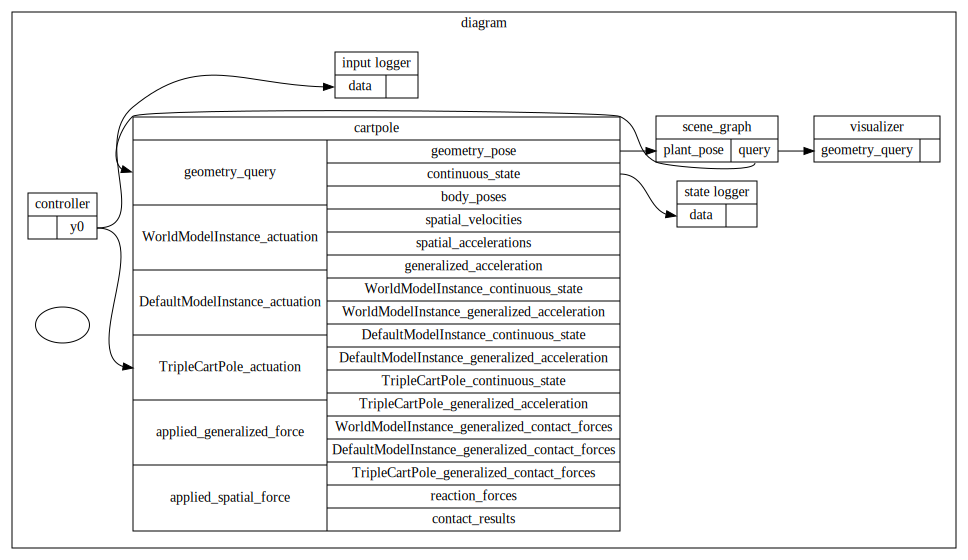

In [24]:
df = run_trajectory(trajectory_inputs)

In [31]:
base_chart = alt.Chart(df).encode(
    alt.X("time:Q", title="Time (s)"),
)
input_chart = base_chart.mark_line(color="orange").encode(
    alt.Y("u:Q", title="Torque (Nm)", axis=alt.Axis(titleColor="orange")),
)
theta_1_chart = base_chart.mark_line().encode(
    alt.Y("theta_1:Q", title="Theta (rad)"),
)

alt.layer(input_chart, theta_1_chart).resolve_scale(y="independent")

alt.LayerChart(...)